In [1]:
from standardInclude import *
from fit_util import *
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(0)

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [57]:
with open('param_dict.txt','r') as inf:
    anal_dict = eval(inf.read())
print(anal_dict)
    
analyses = anal_dict['analyses']
requiredParams = anal_dict['requiredParams']
colors = anal_dict['colors']
startTime = anal_dict['startTime']
endTime = anal_dict['endTime']

for x in analyses:
    if (len(x) is not requiredParams):
        print("Error: could not find the required parameters for", x[0])
        
histVec = []
for i, (name, fileName, histName, scaleFactor, file2, hist2, scale2, preferredStart, preferredEnd) in enumerate(analyses):
    f = r.TFile(fileName)
    hi = f.Get(histName).Clone("hi")
    hi.SetDirectory(0)
    hi.SetTitle(name)
    hi.SetLineColor(colors[i])
    
    #scale the axes so that they are all in microseconds
    nbins = hi.GetNbinsX()
    currentMin = hi.GetXaxis().GetBinCenter(1) - hi.GetXaxis().GetBinWidth(1)/2.0
    currentMax = hi.GetXaxis().GetBinCenter(nbins) + hi.GetXaxis().GetBinWidth(nbins)/2.0
    print(currentMin*scaleFactor, currentMax)
    hi.GetXaxis().SetLimits( currentMin*scaleFactor, currentMax*scaleFactor )
    if(scaleFactor is not 1):
        hi.GetXaxis().SetTitle("Time [#mus, Converted]")
    else:
        hi.GetXaxis().SetTitle("Time [#mus]")
    
    histVec.append( hi.Clone("hist_"+name) )
    histVec[i].SetDirectory(0)
    f.Close()
print(histVec)
names = [x[0] for x in analyses]

{'requiredParams': 9, 'colors': [1, 2, 3, 4, 6, 7, 9], 'startTime': 30.19, 'endTime': 650.07445, 'energyThreshold': 1710.0, 'analyses': [['Aaron', './data/aaron/UW60HourHists.root', 'THist', 1, './data/aaron/UW60HourHists.root', 'THist', 1, 30.198, 650.0], ['Nick', './data/nick/Kinnaird_histsForJosh.root', 'compareHist', 0.001, './data/nick/Kinnaird_histsForJosh.root', 'defaultHist', 0.001, 30.2, 650.0], ['David', './data/david/histograms1_60h.root', '60h_t_time1_b2', 1, './data/david/histograms1_60h.root', '60h_t_time1_b1', 1, 30.2876, 650.0644], ['Bingzhi', './data/bingzhi/60h_to_josh.root', 'wiggle1700/wiggle_th1700_Josh', 1, './data/bingzhi/60h_to_josh.root', 'wiggle1700/wiggle_th1700', 1, 30.3622, 650.0], ['Nick_ADT_5', './data/nick/Kinnaird_histsForJosh_ADT_5.root', 'compareHist', 0.001, './data/nick/Kinnaird_histsForJosh_ADT_5.root', 'defaultHist', 0.001, 30.2, 650.0], ['Bingzhi_NoADT', './data/bingzhi/60h_to_josh_new.root', 'wiggle1700/wiggle_th1700_Josh_no5nsADT', 1, './data/b

29.966215000000002 30.264595000000003
202 4357
Aaron 934430914.0
29.966214999999995 30.264594999999996
202 4358
Nick 935317294.0
29.966215 30.264595
202 4357
David 922642581.0
29.966215 30.264595
0 4155
Bingzhi 930417625.0
29.966214999999995 30.264594999999996
202 4358
Nick_ADT_5 935879387.0
29.966215 30.264595
0 4155
Bingzhi_NoADT 926423704.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


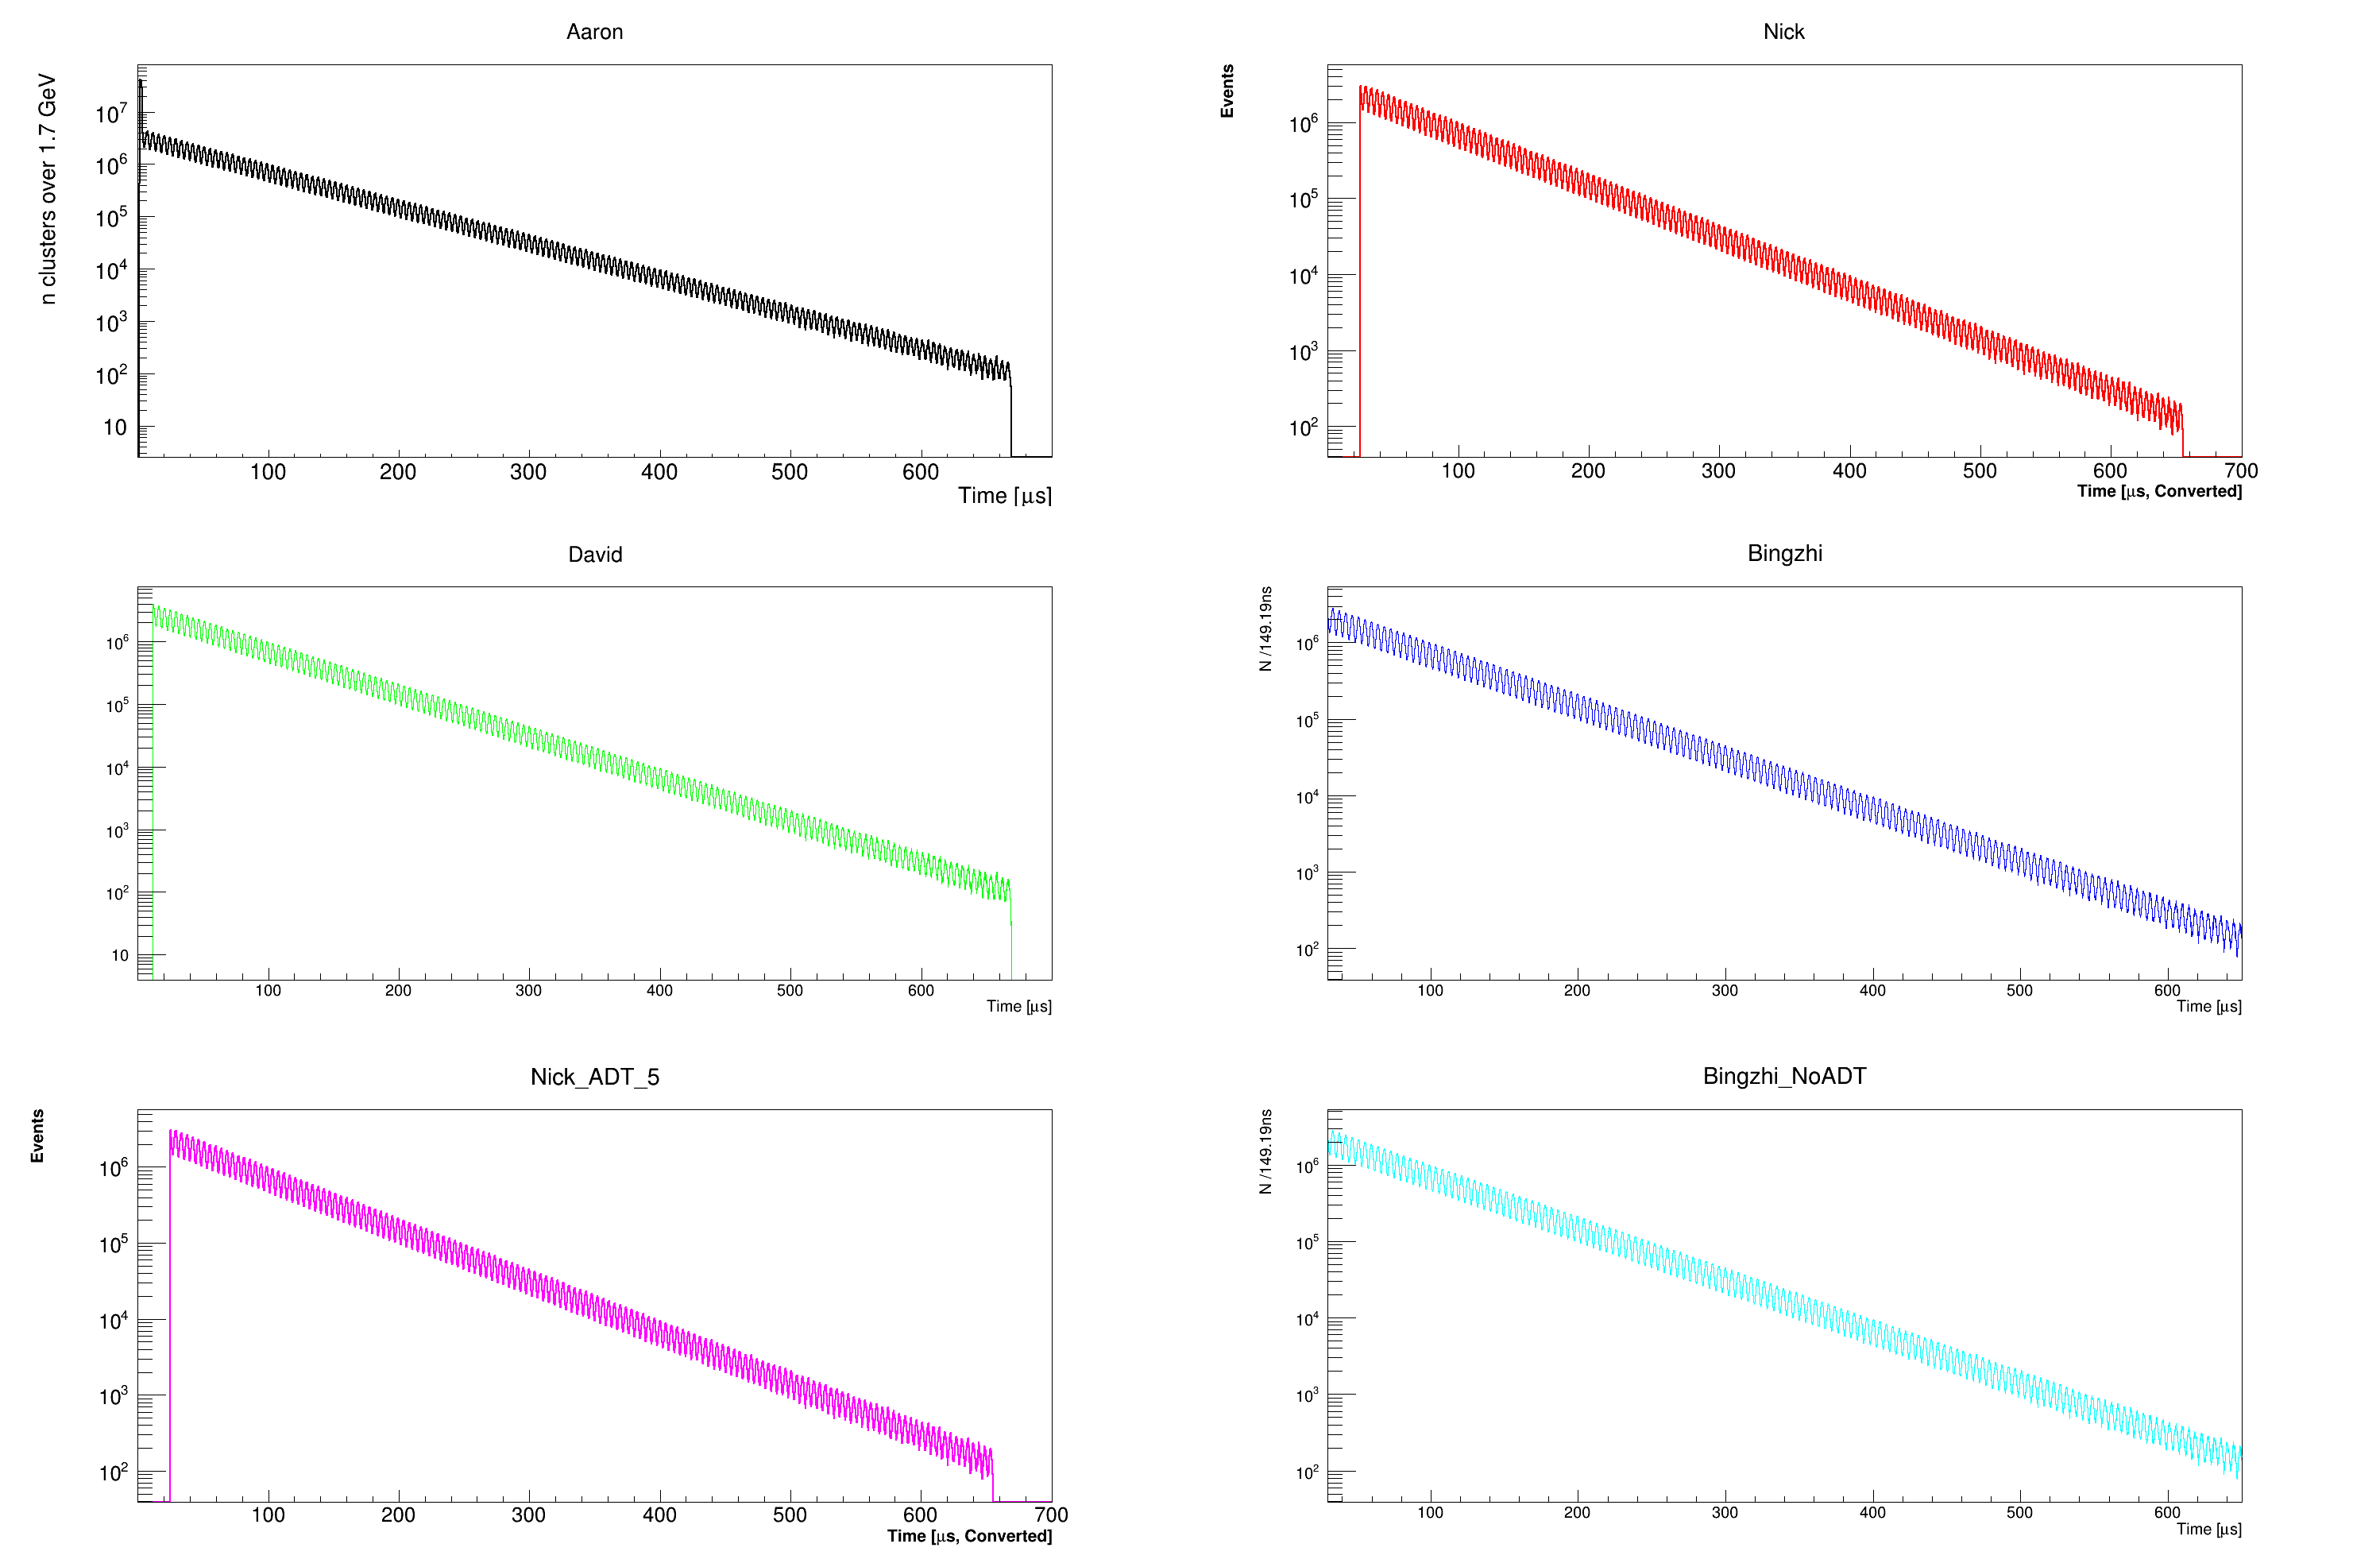

In [58]:
c = r.TCanvas("c","c",3000,2000)
c.Divide(2, int(np.ceil(len(analyses)/2)))
ctags = []
for i, hi in enumerate(histVec):
    c.cd(i+1)
    hi.Draw("hist")
    #inti = hi.Integral( hi.GetXaxis().FindBin(startTime), hi.GetXaxis().FindBin(endTime))
    bin1 =  hi.GetXaxis().FindBin(startTime-0.0000000005)
    bin2 = hi.GetXaxis().FindBin(endTime)
    print(hi.GetBinCenter(bin1) - hi.GetBinWidth(bin1), hi.GetBinCenter(bin1) + hi.GetBinWidth(bin1))
    print(bin1,bin2)
    inti = hi.Integral( bin1, bin2)
    ctags.append(inti)
    print(analyses[i][0], inti)
    r.gPad.SetLogy()
c.Draw()

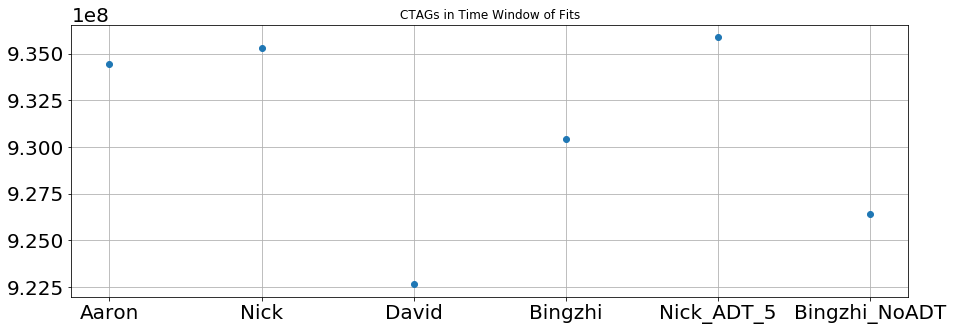

In [59]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(ctags,"o")
plt.xticks([i for i in range(len(names))], names)
plt.title("CTAGs in Time Window of Fits")
plt.grid()
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::SaveAs>: ROOT file allHists.root has been created


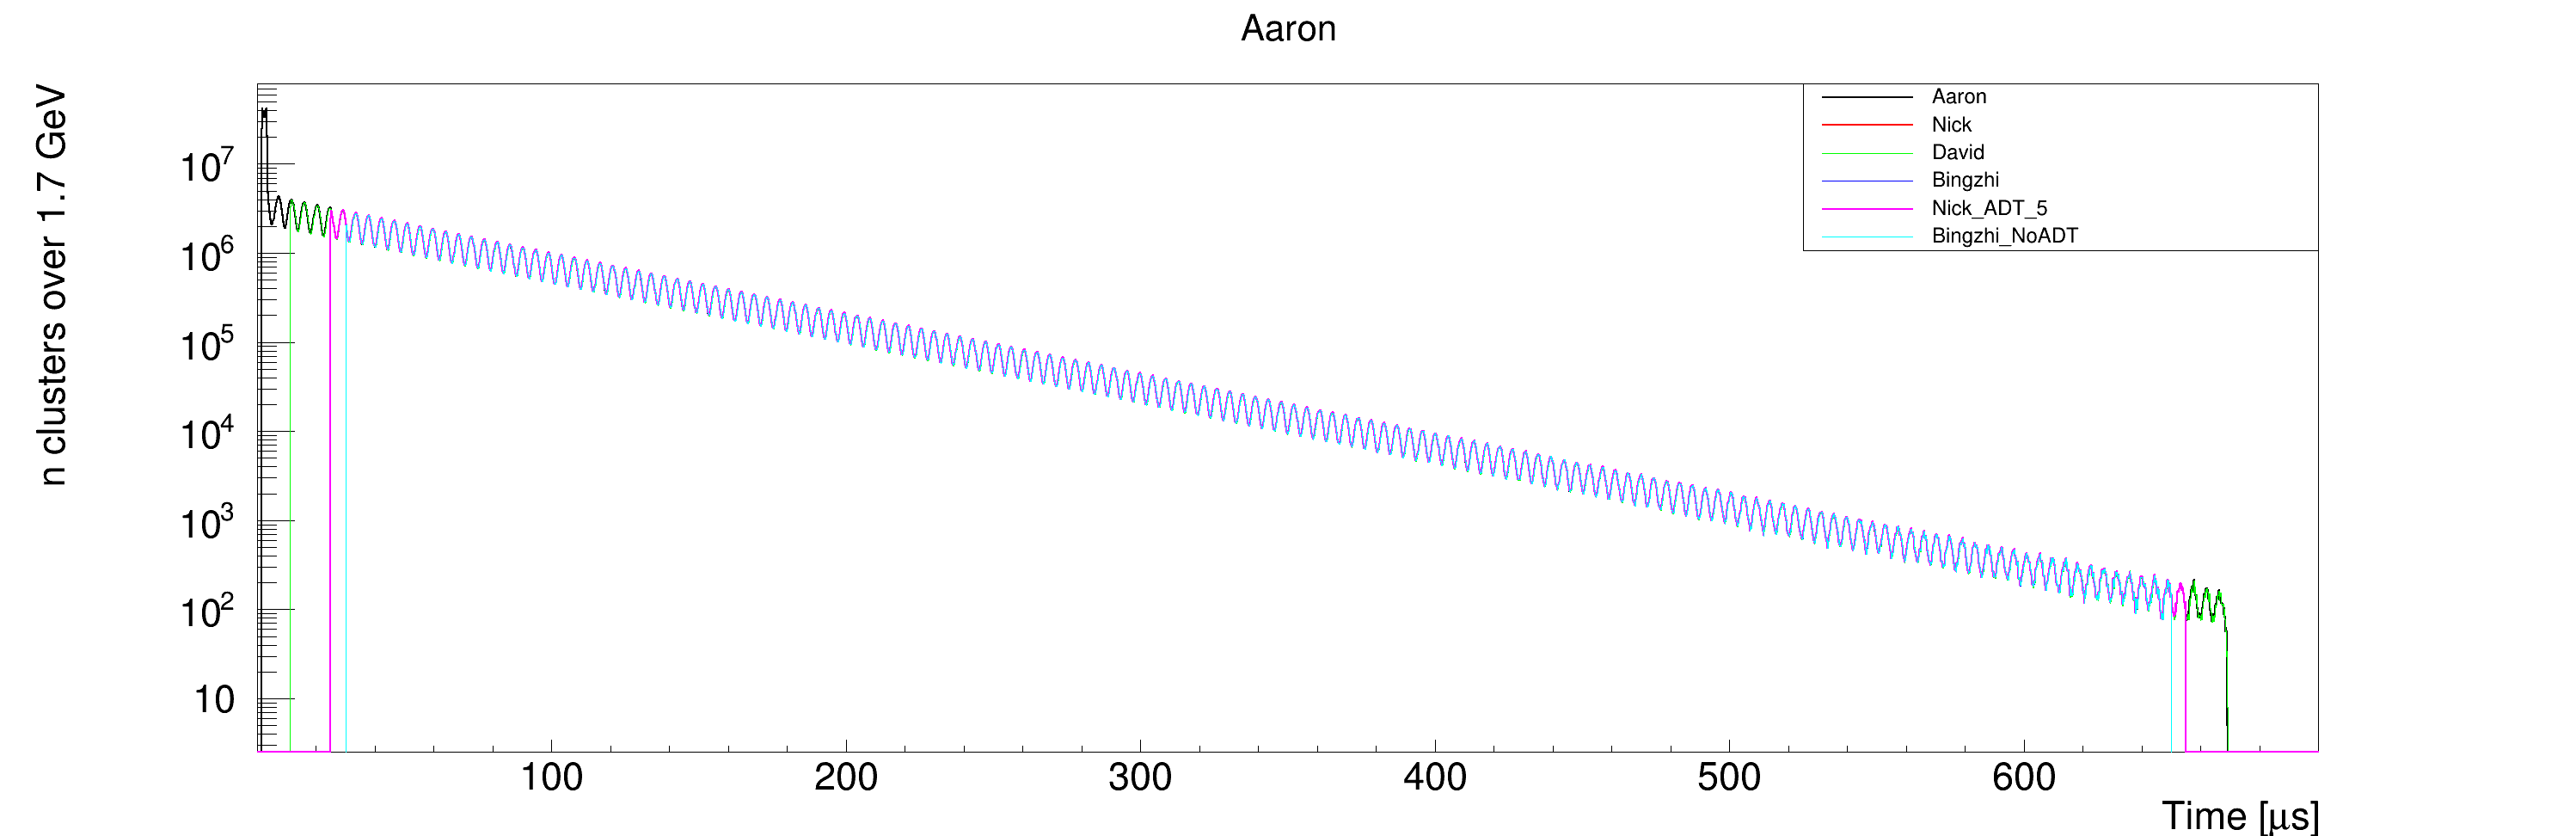

In [60]:
c = r.TCanvas("c","c",3000,1000)
#c.Divide(2, int(np.ceil(len(analyses)/2)))
leg2 = r.TLegend(0.7,0.7,0.9,0.9)

for i, hi in enumerate(histVec):
    if(i < 1):
        hi.Draw("HIST")
    else:
        hi.Draw("HIST SAME")
    leg2.AddEntry(histVec[i], analyses[i][0],"lf")
        
leg2.Draw()

c.SetLogy()
c.Draw()
c.Print("allHists.root")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


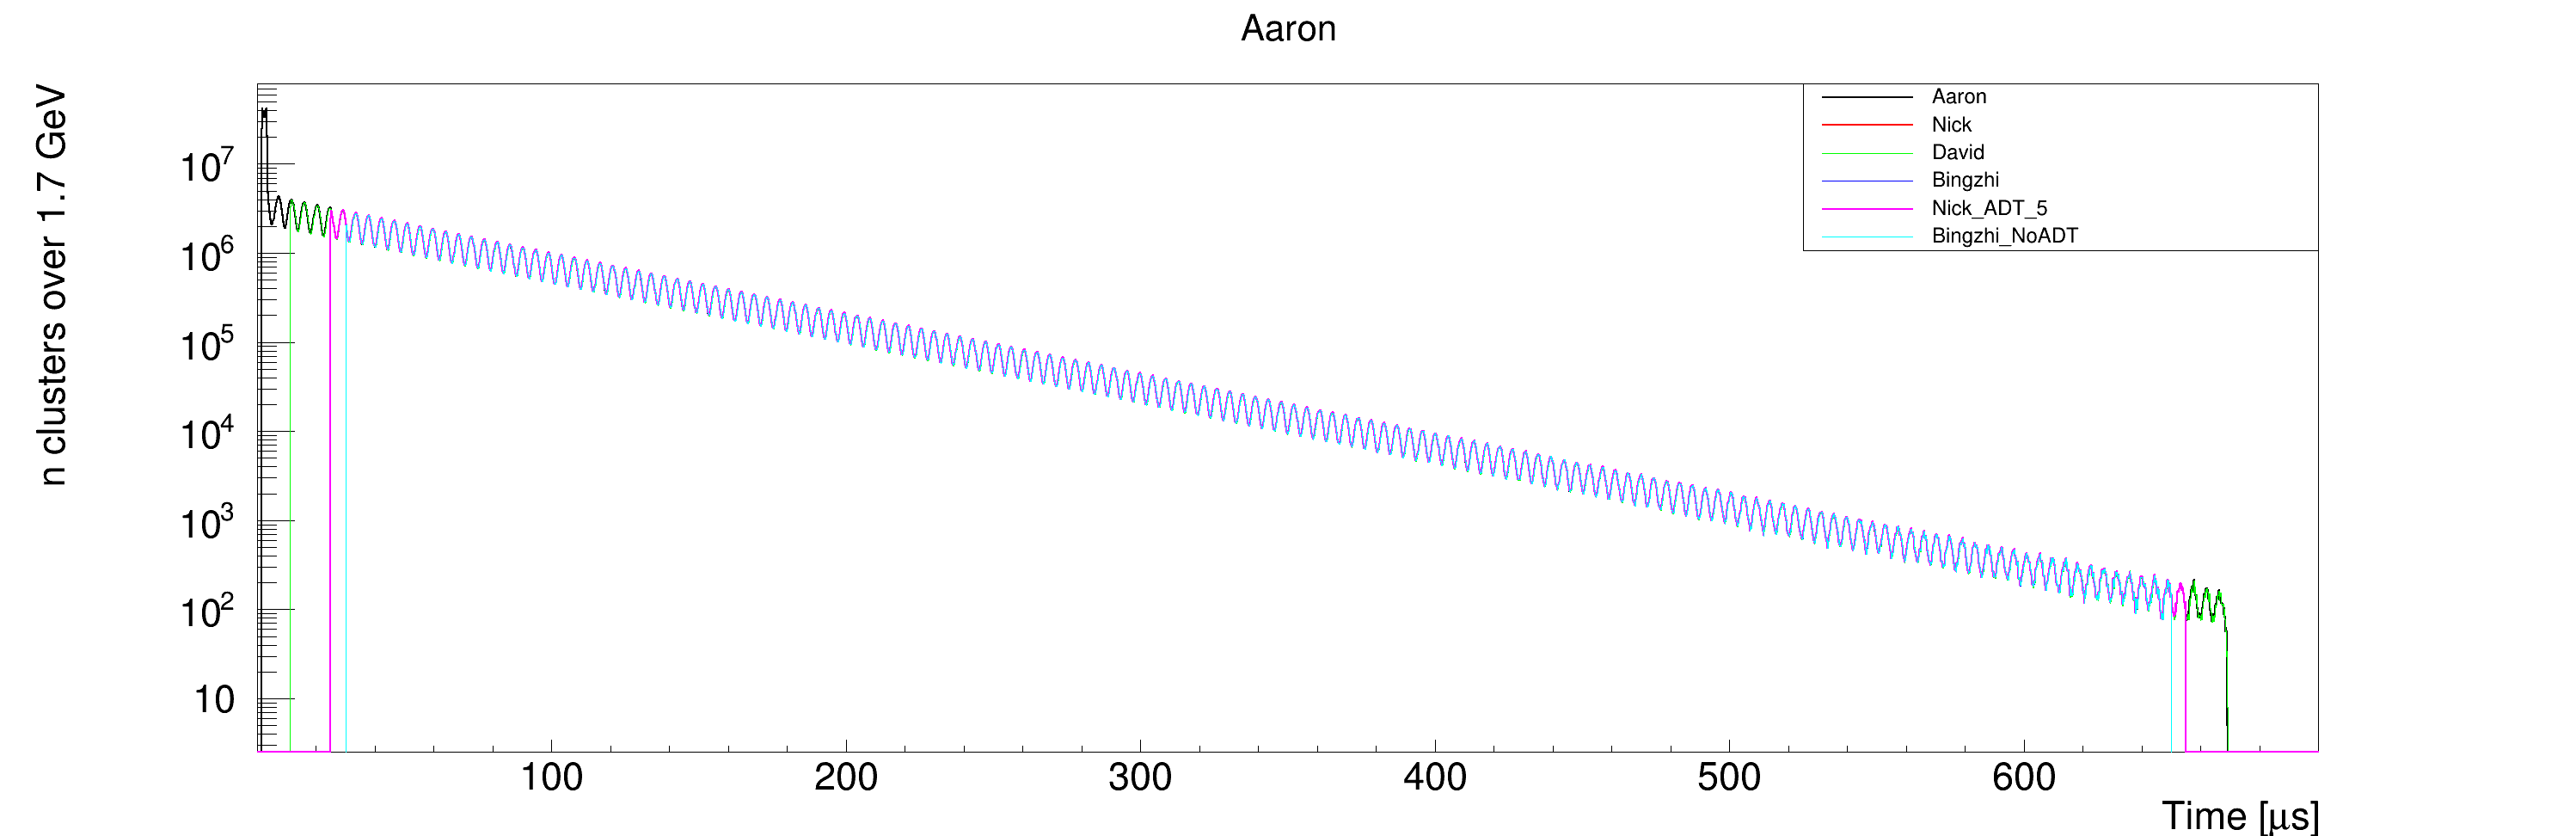

In [61]:
c = r.TCanvas("c","c",3000,1000)
#c.Divide(2, int(np.ceil(len(analyses)/2)))
leg2 = r.TLegend(0.7,0.7,0.9,0.9)

for i, hi in enumerate(histVec):
    if(i < 1):
        hi.Draw("HIST")
        #hi.GetXaxis().SetRangeUser(30,100)
    else:
        hi.Draw("HIST SAME")
    leg2.AddEntry(histVec[i], analyses[i][0],"lf")
        
leg2.Draw()

c.SetLogy()
c.Draw()

In [62]:
def compareHists(hi_1, hi_2, verbosity = 0):
    whereToRound = 6
    h1 = histVec[hi_1]
    h2 = histVec[hi_2]
    hists = [h1, h2]
    nums = [hi_1, hi_2]
    print(nums)
    name1 = analyses[hi_1][0]
    name2 = analyses[hi_2][0]
    
    h3 = h1.Clone("comparison_"+str(name1)+"_"+str(name2))
    h3.Reset()
    h3.SetTitle("Difference Hist: "+str(name1)+" vs. "+str(name2))
    
    for i, hi in enumerate(hists):
        print("For Hist: ", analyses[nums[i]][0])
        nbins = hi.GetNbinsX()
        print("\t Bins: ", nbins)
        print("\t X-Limits: ", hi.GetXaxis().GetBinCenter(1) - hi.GetXaxis().GetBinWidth(1)/2.0
                             , hi.GetXaxis().GetBinCenter(nbins) + hi.GetXaxis().GetBinWidth(nbins)/2.0 )
        print("\t Bin Width: ", hi.GetXaxis().GetBinWidth(1))
        print("\t Bins: ", hi.GetNbinsX())
        
    nbins = min( [h1.GetNbinsX(), h2.GetNbinsX()] )
    #print("Using smaller bin number:", nbins)
    nbins1 = h1.GetNbinsX()
    nbins2 = h2.GetNbinsX()
    
    if(round(h1.GetBinWidth(2), whereToRound) != round( h2.GetBinWidth(2), whereToRound)):
        print("ERROR: Bin sizes do not match")
        return h3
    
    previousBinMatch = 1
    for bini in range(1,nbins1+1):
    #for bini in range(200,250):
        #get the bin info from h3, cloned from h1
        binCenter = round( h3.GetBinCenter(bini) ,whereToRound)
        binWidth = round( h3.GetBinWidth(bini) , whereToRound)
        
        #check if the bin centers are the same
        hasBinError = False
        for binj in range(previousBinMatch,nbins2+1):
            binCenter_2 = round( h2.GetBinCenter(binj), whereToRound)
            binWidth_2 = round(h2.GetBinWidth(binj) , whereToRound)

            if((round(binCenter,whereToRound) == round(binCenter_2,whereToRound)) and (round(binWidth,whereToRound) == round(binWidth_2,whereToRound))):
            #if(np.abs(round(binCenter,whereToRound) - round(binCenter_2,whereToRound)) < 0.00000001 ):# and (round(binWidth,whereToRound) == round(binWidth_2,whereToRound))):
                #print("hi")
                h3.SetBinContent( bini,  h1.GetBinContent(bini) - h2.GetBinContent(binj) )
                previousBinMatch = binj
                break
            #print("error: bins are not the same ---", bini, binj, binCenter, binCenter_2, binWidth, binWidth_2)
            #print("Error: No match found for bin", bini)
            #else:
            #    print("error: bins are not the same ---", binCenter, binCenter_2, binWidth, binWidth_2)
        if(binj == nbins2 and (verbosity > 0)):
            print("Error: No match found for bin", bini, binCenter, binWidth, binCenter - binWidth, binCenter + binWidth,)
            print("   Closest bin:", h2.FindBin(binCenter), 
                  h2.GetBinCenter(h2.FindBin(binCenter)), h2.GetBinWidth(h2.FindBin(binCenter)), 
                  h2.GetBinCenter(h2.FindBin(binCenter)) - h2.GetBinWidth(h2.FindBin(binCenter)),
                 h2.GetBinCenter(h2.FindBin(binCenter)) + h2.GetBinWidth(h2.FindBin(binCenter)),
                 h2.GetBinCenter(h2.FindBin(binCenter)) - binCenter)
        hasBinError = True
    
    return(h3)

In [63]:
def makeDifferenceHists(h1,h2, scaleHists = True, subtractExponential = False):

    ding = compareHists(h1, h2)
    dong = InvertTH1(ding, None, 30, 0)

    #scaleHists = True
    if(scaleHists):
        ding.Divide( histVec[h1] )
        ding.SetTitle( ding.GetTitle()+" [ Scaled by 1/"+analyses[h1][0]+" ]")
        dong.Divide( histVec[h1] )


    c = r.TCanvas("c","c",1200,1000)
    c.Divide(1,2)
    c.cd(1)
    histVec[h1].Draw("HIST ")
    histVec[h2].Draw("HIST SAME")
    r.gPad.SetLogy()

    leg2 = r.TLegend(0.7,0.7,0.9,0.9)
    leg2.AddEntry(histVec[h1], analyses[h1][0],"lf")
    leg2.AddEntry(histVec[h2], analyses[h2][0],"lf")
    leg2.Draw()

    c.cd(2)
    ding.Draw("HIST")
    dong.Draw("HIST SAME")

    leg = r.TLegend(0.7,0.7,0.9,0.9)
    leg.AddEntry(ding, analyses[h1][0]+" - "+analyses[h2][0],"lf")
    leg.AddEntry(dong, analyses[h2][0]+" - "+analyses[h1][0],"lf")
    leg.Draw()

    #ding.GetXaxis().SetRangeUser(20,100)
    #ding.GetXaxis().SetRangeUser(625,700)
    #ding.GetXaxis().SetRangeUser(startTime,endTime)
    #ding.GetYaxis().SetRangeUser(0.9,10**7)
    r.gPad.SetLogy()

    c.Draw()
    
    #fft of difference hists in the region of interest

    if( ding.Integral( ding.FindBin(40), ding.FindBin(80)) > 0):
        histToFit = ding#.Clone("tofit")
    else:
        histToFit = dong#.Clone("tofit")
    
    if(not subtractExponential):
        expo_func = r.TF1("placeholder","pol0",0,700)
        expo_func.SetParameter(0,0.)
    else:
        expo_func = r.TF1("expo_func","expo",startTime, endTime)
        #expo_func = r.TF1("expo_func","[0]*TMath::Exp(-1*x[0]/p[1])",startTime, endTime,2)
        expo_func.SetParameters(10, -2.92137e-02)
        #expo_func.SetParLimits(0, 0.0001, 1000)
        #expo_func.SetParLimits(1, -0.000001, -1000)
        expo_func.SetLineColor(1)
        for i in range(2):
            histToFit.Fit(expo_func,"REMB")
    expo_func.Draw("same")
    

    fft_resid = fourierXformWiggle(histToFit, 
                                   #placeholder_func, 
                                   expo_func, 
                                   startTime, endTime, 
                                   "FFT of Difference Plot between "+str(startTime)+" and "+str(endTime)+"#mus")
    
    return (ding, dong, fft_resid, c, leg, leg2, expo_func)

In [64]:
h1 = 0
h2 = 1
ding = makeDifferenceHists(h1, h2, scaleHists = False, subtractExponential = True)

IndexError: list index out of range

In [65]:
ding[0].Integral(ding[0].GetXaxis().FindBin(30),ding[0].GetXaxis().FindBin(650))

6620026.0

In [66]:
ding[1].Integral(ding[1].GetXaxis().FindBin(30),ding[1].GetXaxis().FindBin(650))

-6620026.0

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


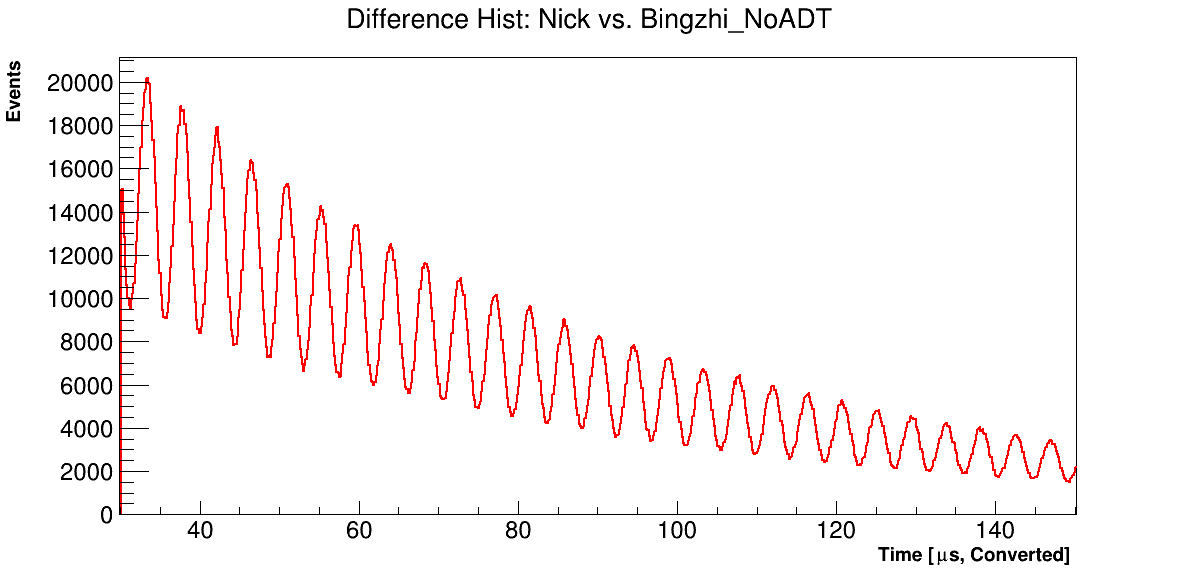

In [67]:
c =  r.TCanvas("c","c",1200,600)
ding[0].GetXaxis().SetRangeUser(30,150)
ding[0].Draw()
#c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


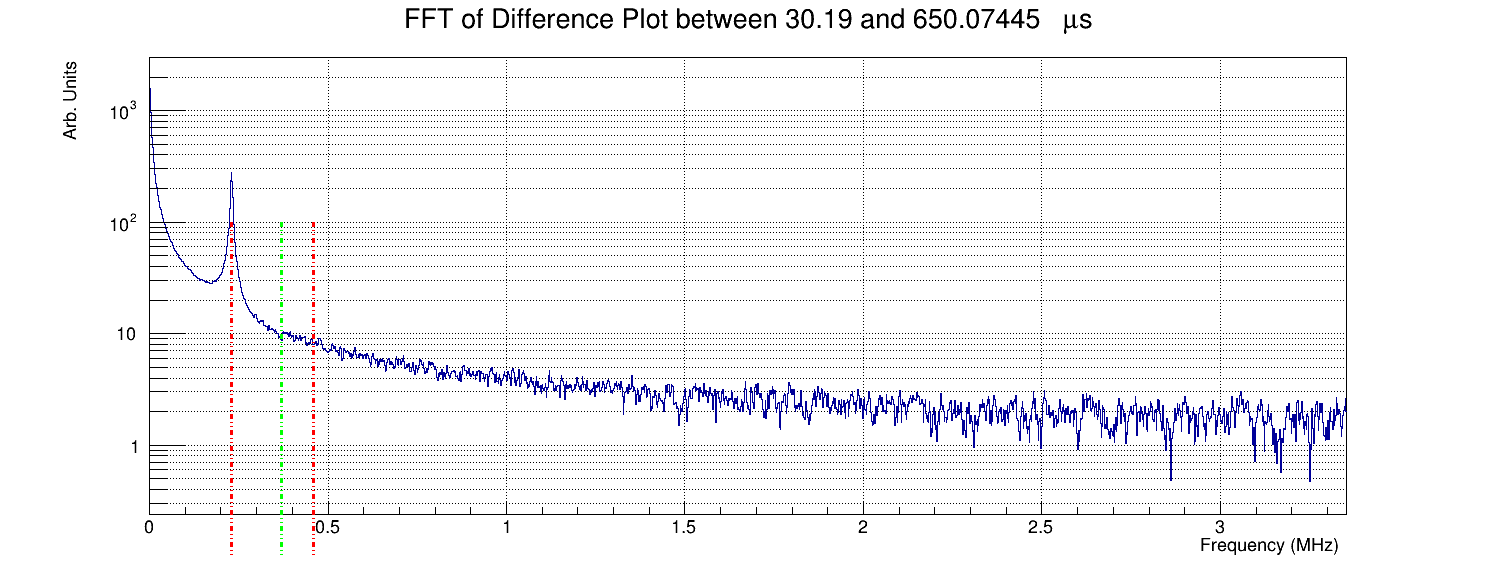

In [68]:
c = r.TCanvas("c","c",1500,600)
ding[2].Draw("hist")
c.SetLogy()
c.SetGrid()

omega_a = 0.23
omega_cbo = 0.37
y1 = 0.1
y2 = 100

line1 = r.TLine(omega_a,y1,omega_a,y2)
line1.SetLineStyle(8)
line1.SetLineColor(2)
line1.SetLineWidth(3)
line1.Draw()

line2 = r.TLine(2*omega_a,y1,2*omega_a,y2)
line2.SetLineStyle(8)
line2.SetLineColor(2)
line2.SetLineWidth(3)
line2.Draw()

line3 = r.TLine(omega_cbo,y1,omega_cbo,y2)
line3.SetLineStyle(8)
line3.SetLineColor(3)
line3.SetLineWidth(3)
line3.Draw()

c.Draw()

---

0 1
[0, 1]
For Hist:  Aaron
	 Bins:  4691
	 X-Limits:  0.053620000000002235 699.9039100000002
	 Bin Width:  0.14919000000000002
	 Bins:  4691
For Hist:  Nick
	 Bins:  4692
	 X-Limits:  0.05362 700.0531000000001
	 Bin Width:  0.14919
	 Bins:  4692
4691
4155 [(30.264595000000003, 4265.0), (30.413785000000004, 4161.0), (30.562975000000005, 4005.0), (30.712165000000006, 4143.0), (30.861355000000003, 4037.0)]
4155 619.73526 30.190017953068597 649.9252779530686
0.1491540938628159 0.0016135922296885285
13.40895142871167 6.704475714355835
0 2
[0, 2]
For Hist:  Aaron
	 Bins:  4691
	 X-Limits:  0.053620000000002235 699.9039100000002
	 Bin Width:  0.14919000000000002
	 Bins:  4691
For Hist:  David
	 Bins:  4691
	 X-Limits:  0.053620000000000015 699.9039100000002
	 Bin Width:  0.14919000000000002
	 Bins:  4691
4691
4155 [(30.264595000000003, 28709.0), (30.413785000000004, 26289.0), (30.562975000000005, 24973.0), (30.712165000000006, 23714.0), (30.861355000000003, 22235.0)]
4155 619.73526 30.190017

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same nam

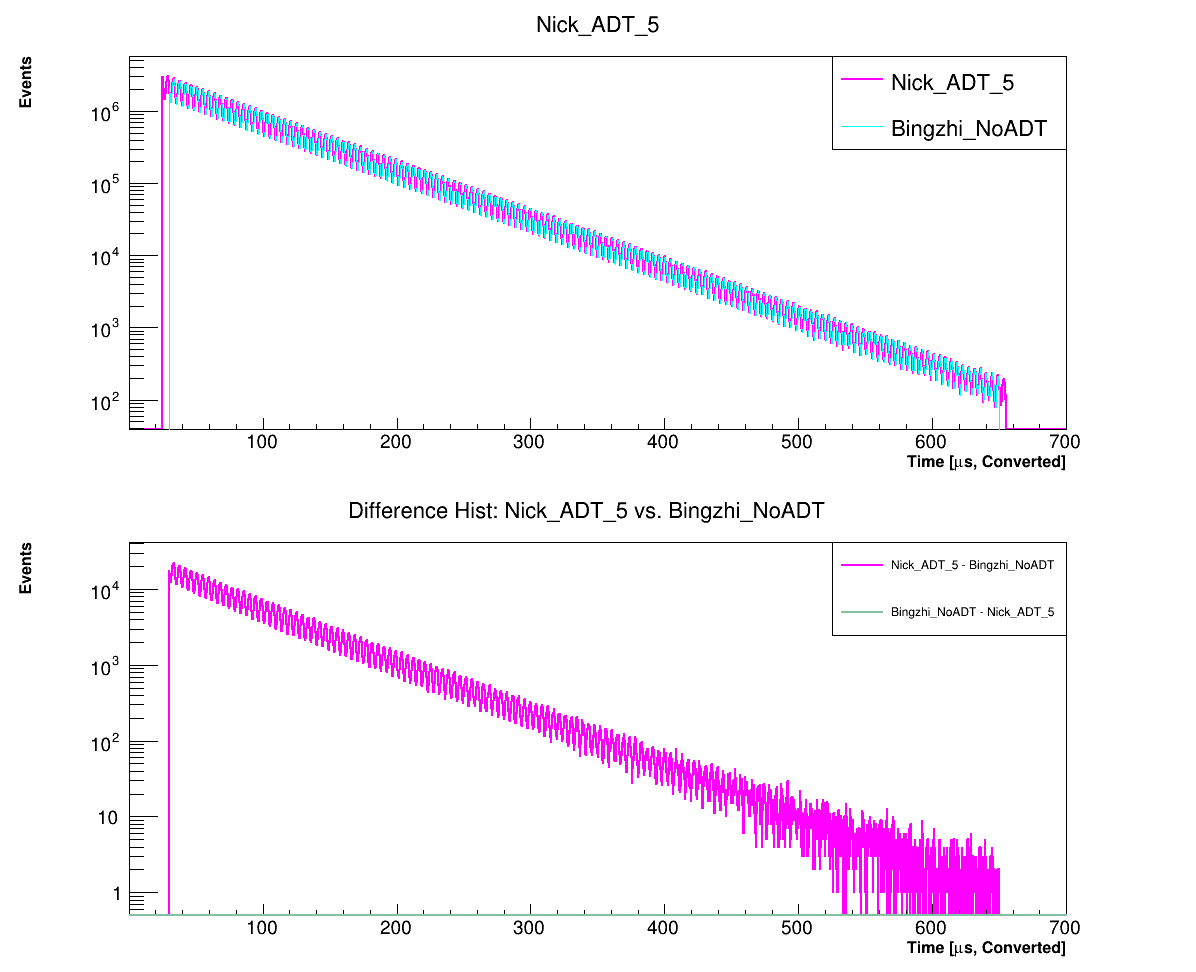

In [69]:
diffVec = []
diffHistVec = []
fftHistVec = []
for i in range(len(analyses)):
    for j in range(i+1, len(analyses)):
        print(i,j)
        ding = makeDifferenceHists(i, j, scaleHists = False, subtractExponential=False)
        hi = ding[0]
        diffHistVec.append( hi.Clone("h_"+str(i)+"_"+str(j)) )
        fftHistVec.append( ding[2].Clone("fft_"+str(i)+"_"+str(j)) )
        inti = hi.Integral( hi.GetXaxis().FindBin(startTime - .0000000005), hi.GetXaxis().FindBin(endTime))
        diffVec.append([i, j, inti])
print(diffVec)

In [70]:
diffNames = []
ctagOfFirstInDiff = []
for i,j,inti in diffVec:
    namei = analyses[i][0]+" - "+analyses[j][0]
    diffNames.append(namei)
    ctagOfFirstInDiff.append(ctags[i])
print(diffNames)
print(len(diffNames))

['Aaron - Nick', 'Aaron - David', 'Aaron - Bingzhi', 'Aaron - Nick_ADT_5', 'Aaron - Bingzhi_NoADT', 'Nick - David', 'Nick - Bingzhi', 'Nick - Nick_ADT_5', 'Nick - Bingzhi_NoADT', 'David - Bingzhi', 'David - Nick_ADT_5', 'David - Bingzhi_NoADT', 'Bingzhi - Nick_ADT_5', 'Bingzhi - Bingzhi_NoADT', 'Nick_ADT_5 - Bingzhi_NoADT']
15


[<ROOT.TH1D object ("h_0_1") at 0x7ffff0cdfe10>, <ROOT.TH1D object ("h_0_2") at 0x7ffff1c3b330>, <ROOT.TH1D object ("h_0_3") at 0x7ffff1926dd0>, <ROOT.TH1D object ("h_0_4") at 0x7ffff1c65880>, <ROOT.TH1D object ("h_0_5") at 0x7ffff21bef10>, <ROOT.TH1F object ("h_1_2") at 0x7ffff1cea410>, <ROOT.TH1F object ("h_1_3") at 0x7f870cb87af0>, <ROOT.TH1F object ("h_1_4") at 0x7f870cb92100>, <ROOT.TH1F object ("h_1_5") at 0x7ffff1e771d0>, <ROOT.TH1D object ("h_2_3") at 0x7ffff1dbe5b0>, <ROOT.TH1D object ("h_2_4") at 0x7f870cff1cf0>, <ROOT.TH1D object ("h_2_5") at 0x7f870cff1510>, <ROOT.TH1D object ("h_3_4") at 0x7ffff23c15c0>, <ROOT.TH1D object ("h_3_5") at 0x7ffff1deeb90>, <ROOT.TH1F object ("h_4_5") at 0x7ffff1df4870>]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


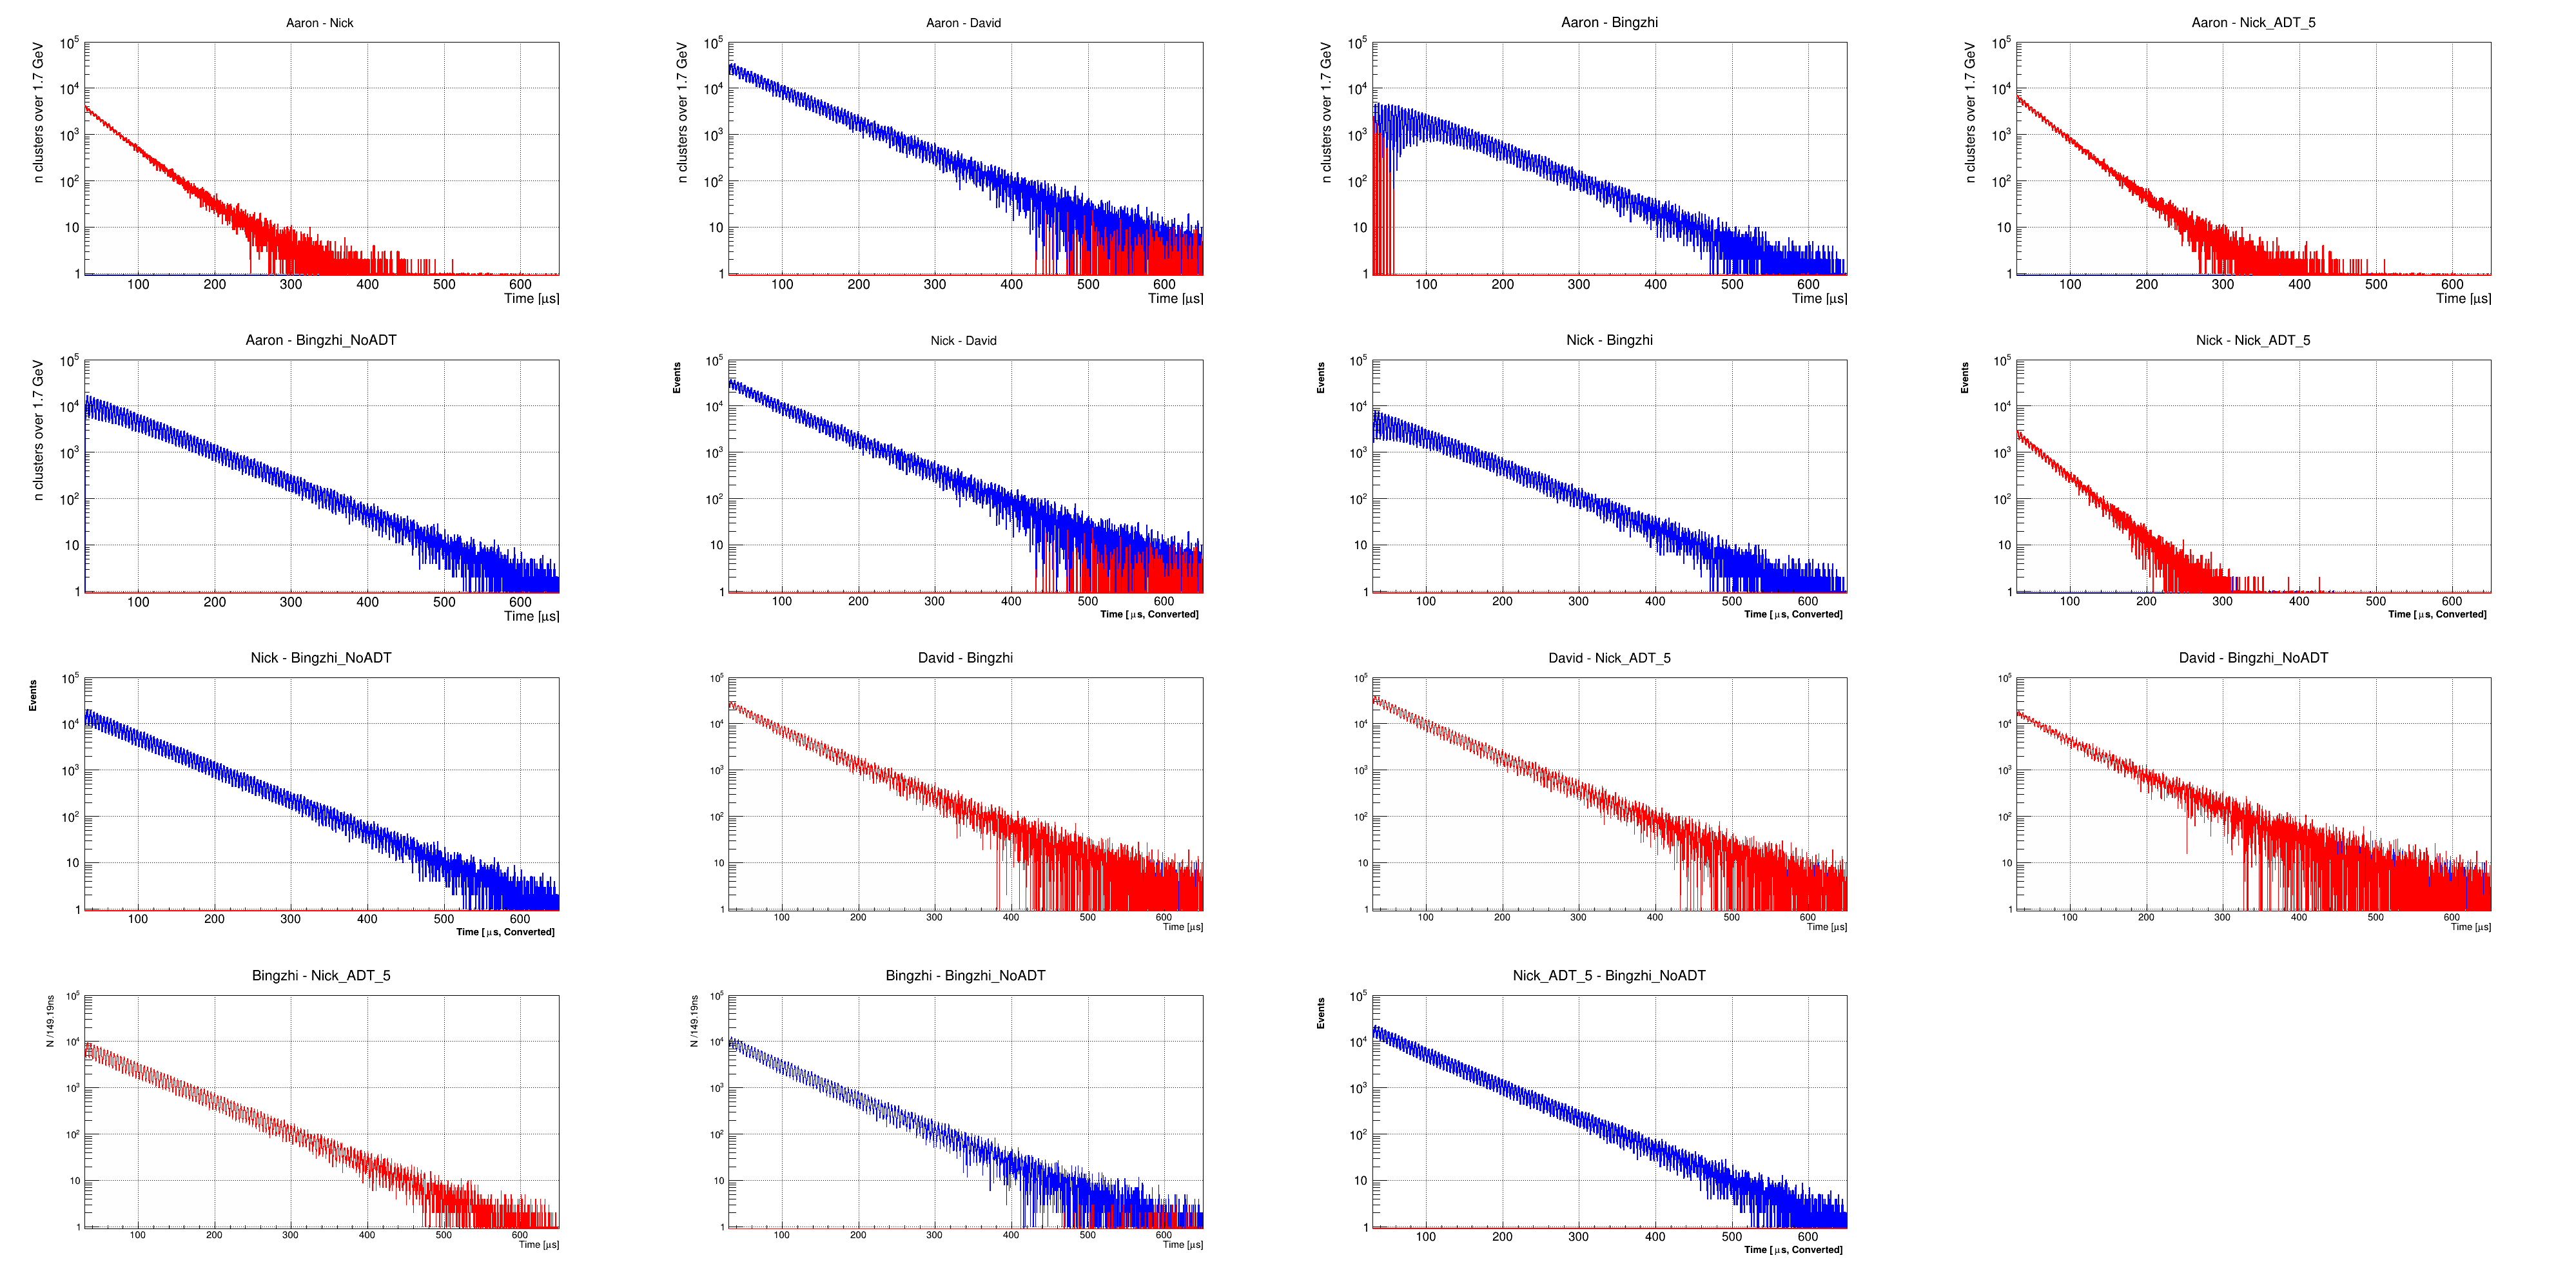

In [71]:
print(diffHistVec)

c = r.TCanvas("c","c",4000,2000)
c.Divide(4,4)
for i, h in enumerate(diffHistVec):
    c.cd(i+1)
    #if(h.Integral(h.FindBin(50), h.FindBin(100)) > 10):
    #    hi = h
    #else:
    #    hi = InvertTH1(h, diffNames[i], 4, 0)
    
    hi=h
    hi.SetTitle(diffNames[i])
    hi.GetYaxis().SetRangeUser(0.9,100000)
    hi.GetXaxis().SetRangeUser(startTime, endTime)
    hi.SetLineColor(4)
    hi.DrawCopy()
    
    hi2 = InvertTH1(hi, "", 2, 0)
    hi2.DrawCopy("SAME")
    
    r.gPad.SetLogy()
    r.gPad.SetGrid()
c.Draw()

[<ROOT.TH1D object ("fft_0_1") at 0x7ffff0cf2a90>, <ROOT.TH1D object ("fft_0_2") at 0x7ffff09a9690>, <ROOT.TH1D object ("fft_0_3") at 0x7ffff0f169d0>, <ROOT.TH1D object ("fft_0_4") at 0x7fffeb3f5250>, <ROOT.TH1D object ("fft_0_5") at 0x7fffeb43dd80>, <ROOT.TH1D object ("fft_1_2") at 0x7ffff1cddfa0>, <ROOT.TH1D object ("fft_1_3") at 0x7ffff097a190>, <ROOT.TH1D object ("fft_1_4") at 0x7ffff21b6400>, <ROOT.TH1D object ("fft_1_5") at 0x7ffff1ce3790>, <ROOT.TH1D object ("fft_2_3") at 0x7f870d2394b0>, <ROOT.TH1D object ("fft_2_4") at 0x7ffff23c11d0>, <ROOT.TH1D object ("fft_2_5") at 0x7f870d2a2750>, <ROOT.TH1D object ("fft_3_4") at 0x7ffff1c5ffd0>, <ROOT.TH1D object ("fft_3_5") at 0x7ffff1c60820>, <ROOT.TH1D object ("fft_4_5") at 0x7ffff1cefee0>]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


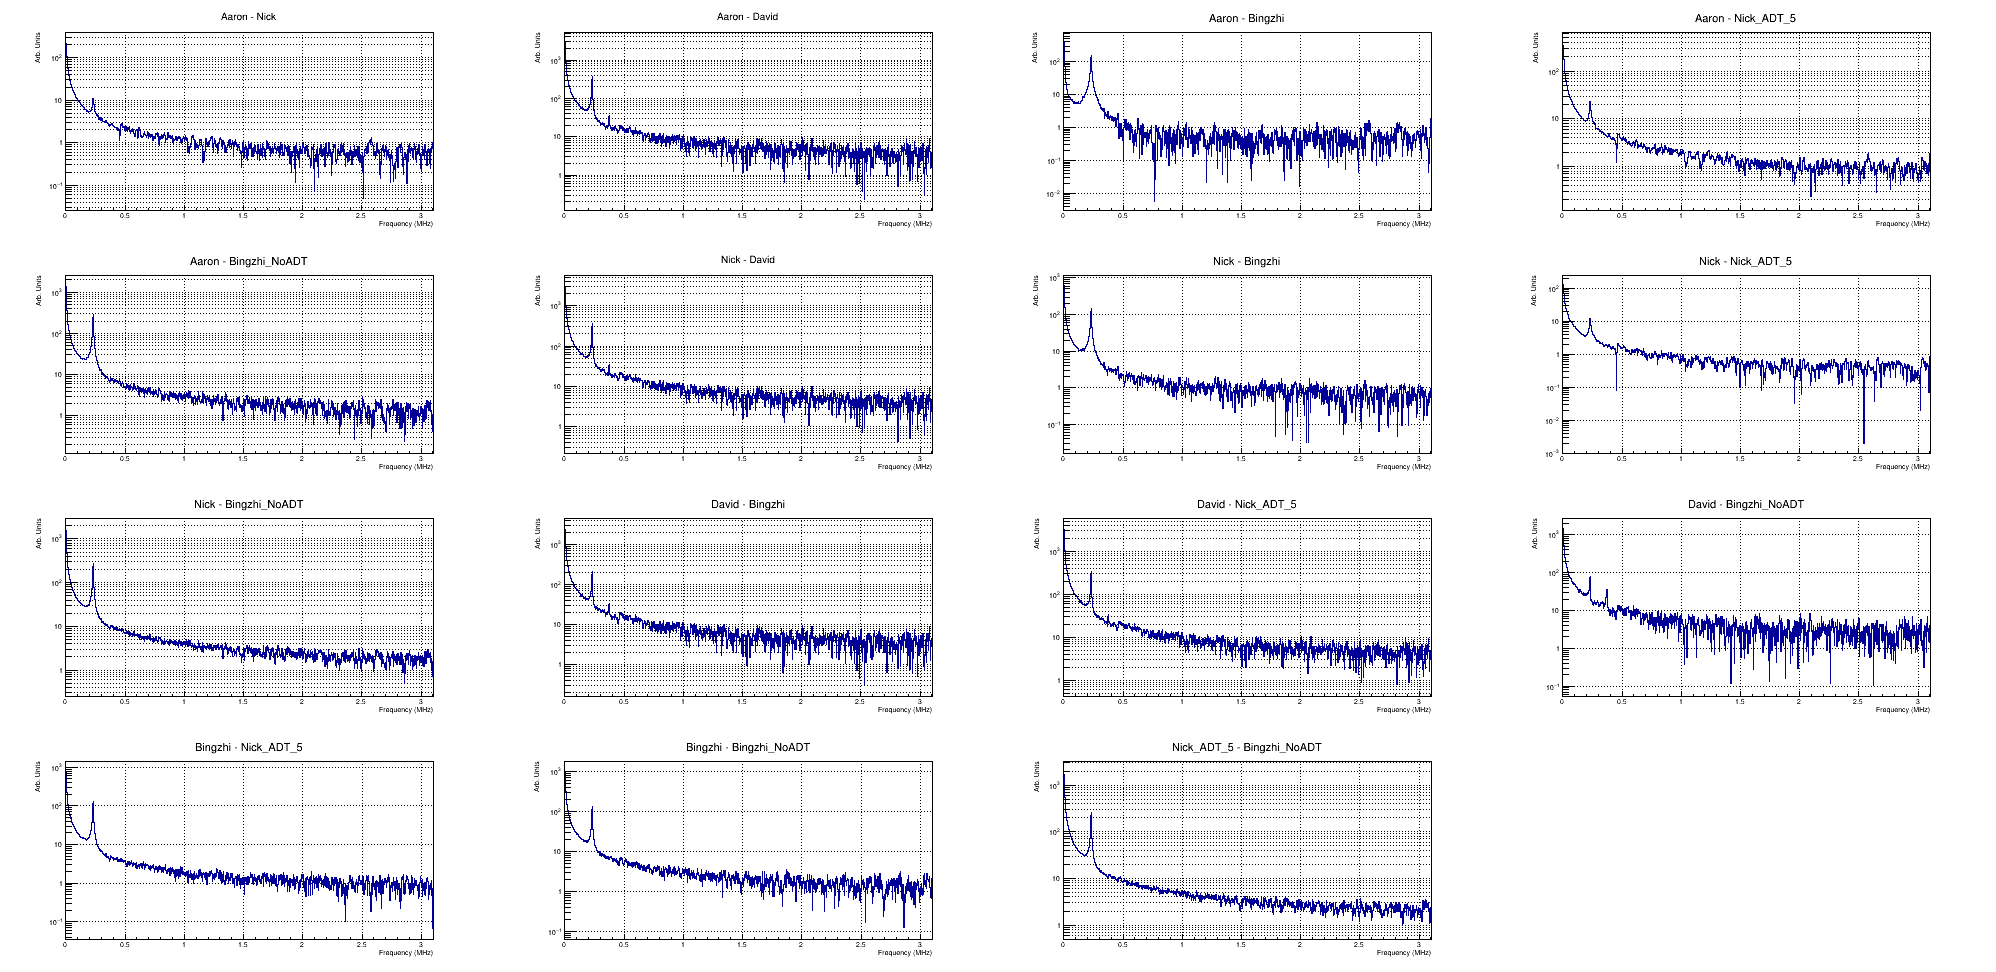

In [72]:
print(fftHistVec)

c = r.TCanvas("c","c",2000,1000)
c.Divide(4,4)
for i, h in enumerate(fftHistVec):
    c.cd(i+1)
    #if(h.Integral(h.FindBin(50), h.FindBin(100)) > 10):
    #    hi = h
    #else:
    #    hi = InvertTH1(h, diffNames[i], 4, 0)
    
    hi=h
    hi.SetTitle(diffNames[i])
    #hi.GetYaxis().SetRangeUser(0.0001,1000)
    hi.GetXaxis().SetRangeUser(0, 3.1)
    #hi.SetLineColor(4)
    hi.DrawCopy("hist")
    
    #hi2 = InvertTH1(hi, "", 2, 0)
    #hi2.DrawCopy("SAME")
    
    r.gPad.SetLogy()
    r.gPad.SetGrid()
c.Draw()

In [73]:
print(diffVec)

[[0, 1, -886235.0], [0, 2, 11788333.0], [0, 3, 1743918.0], [0, 4, -1448328.0], [0, 5, 5737839.0], [1, 2, 12674568.0], [1, 3, 2626105.0], [1, 4, -562093.0], [1, 5, 6620026.0], [2, 3, -10013727.0], [2, 4, -13236661.0], [2, 5, -6019806.0], [3, 4, -3185426.0], [3, 5, 3993921.0], [4, 5, 7179347.0]]


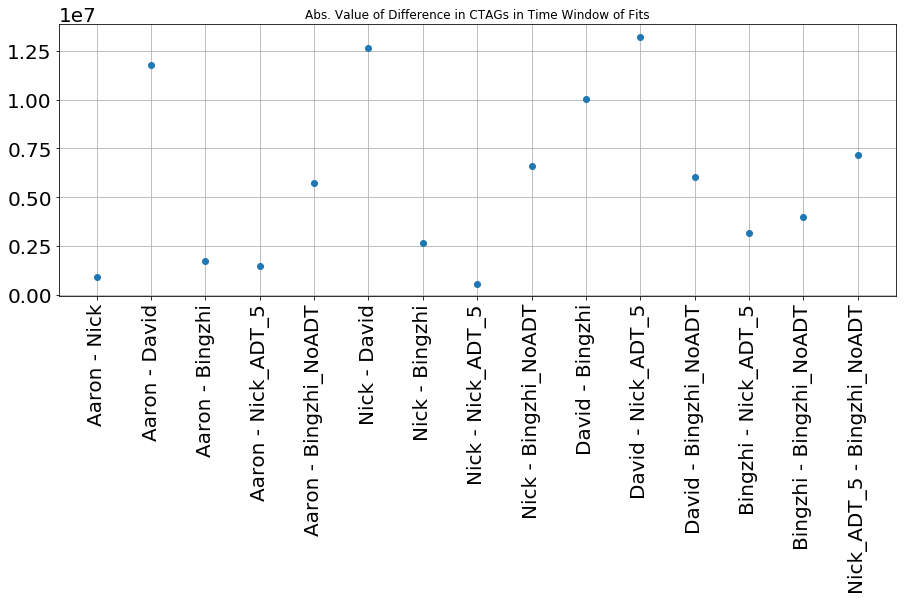

In [74]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot([np.abs(x[2]) for x in diffVec],"o")
plt.xticks([i for i in range(len(diffNames))], diffNames,rotation=90)
plt.title("Abs. Value of Difference in CTAGs in Time Window of Fits")
plt.grid()
#plt.yscale("log")
plt.show()

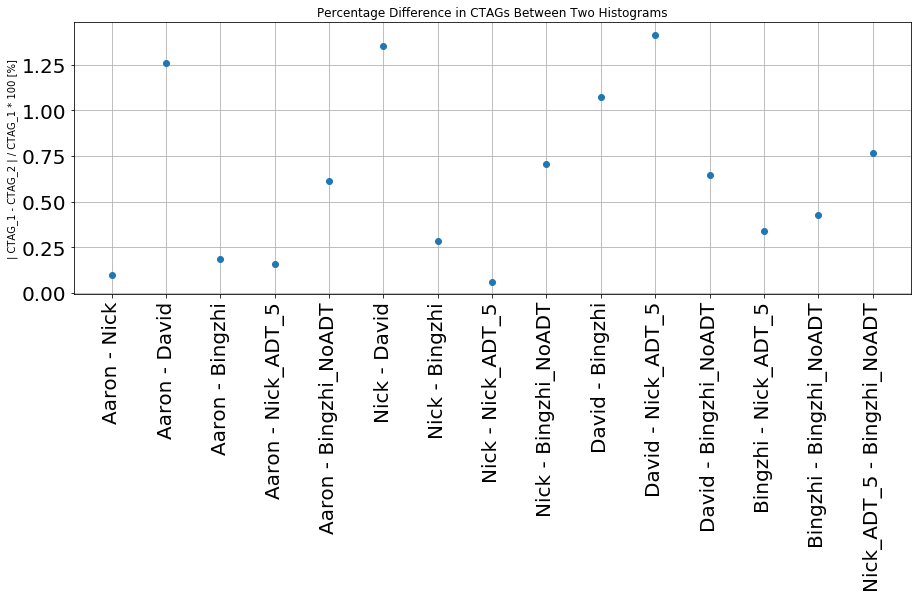

In [79]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot([np.abs(x[2])/ctagOfFirstInDiff[0]*100 for x in diffVec],"o")
plt.xticks([i for i in range(len(diffNames))], diffNames,rotation=90)
plt.title("Percentage Difference in CTAGs Between Two Histograms")
plt.ylabel("| CTAG_1 - CTAG_2 | / CTAG_1 * 100 [%]")
plt.grid()
#plt.yscale("log")
plt.show()